Setup

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#define directory paths

df_paths=[
    "./data/domestic-consumption.csv",
    "./data/exports-calendar-year.csv",
    "./data/exports-crop-year.csv",
    "./data/gross-opening-stocks.csv",
    "./data/total-production.csv"
]

Clean and prepare the data

In [6]:
dfs=[pd.read_csv(df_path) for df_path in df_paths]

In [7]:
#process data 2
#making mean value of every df columns and attaching it to country

def get_means(df):
    df=df.copy()
    countries=df[df.columns[0]]
    mean=df.mean(axis=1)
    df=pd.concat([countries,mean],axis=1)
    df.columns=['country',countries.name]
    return df



In [20]:
#process data 2
def make_df(dfs):
    
    # Process all DataFrames
    processed_dfs = []
    
    for df in dfs:
        processed_dfs.append(get_means(df))
        
    # Merge DataFrames
    df = processed_dfs[0]
    
    for i in range(1, len(processed_dfs)):
        df = df.merge(processed_dfs[i], on='country')
    
    return df

data=make_df(dfs)

/tmp/ipykernel_64272/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_64272/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_64272/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_64272/2645396130.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this wi

In [21]:
##rename columns and output to same csv (already done, doesn't need running)
#df = df.rename(columns={'1990/91': '1990', '1991/92': '1991', '1992/93': '1992', '1993/94': '1993', '1994/95': '1994', '1995/96': '1995', '1996/97': '1996', '1997/98': '1997', '1998/99': '1998', '1999/00': '1999', '2000/01': '2000', '2001/02': '2001', '2002/03': '2002', '2003/04': '2003', '2004/05': '2004', '2005/06': '2005', '2006/07': '2006', '2007/08': '2007', '2008/09': '2008', '2009/10': '2009', '2010/11': '2010', '2011/12': '2011', '2012/13': '2012', '2013/14': '2013', '2014/15': '2014', '2015/16': '2015', '2016/17': '2016', '2017/18': '2017', '2018/19': '2018', '2019/20': '2019'})
#df.to_csv('Domestic_Coffee_Consumption.csv')

In [22]:
#Ensure no null values exist in our data
data.isna().sum() #returns False for all
data = data.dropna()

In [23]:
#Ensure no duplicate rows exist in our data
data.loc[data.duplicated()] #Nothing returned
data = data.drop_duplicates()

In [24]:
#reset data frame and index, sorting by domestic consumption
data = data.sort_values(by='domestic_consumption', ascending=False)
data = data.reset_index(drop=True)

Analysis and Visualization

In [25]:
#Create bar graph of top ten Countries by coffee consumption
top_ten_consume = data.head(10)
top_ten_consume = top_ten_consume.plot.bar(x='country', y = 'domestic_consumption', rot=50, title='Domestic Consumption by Country')
top_ten_consume.set_ylabel('Domestic Consumption')

,country,domestic_consumption,exports,exports_crop_year,gross_opening_stocks,total_production
8,Viet Nam,1016.050759,13048.102878,13701.263769,1483.241414,15156.584548
5,Colombia,1388.097669,10953.061020,10926.738310,2327.965690,11926.601600
1,Indonesia,2662.137931,5878.047357,5879.061059,690.114655,8452.302438
7,India,1153.137931,3777.195530,3896.537276,1058.068966,4552.609690
13,Guatemala,326.034483,3590.512097,3614.588628,106.695931,3910.381731
15,Honduras,259.109586,3194.853765,3355.469269,153.354034,3636.434097
3,Mexico,1749.517241,3143.855086,3109.249886,598.732759,4376.146438
23,Uganda,154.928966,3080.789345,3132.876862,1049.680310,3211.943759
18,Peru,222.413793,2688.290420,2693.919669,107.769345,2923.816221
17,Côte d'Ivoire,224.850655,2640.989406,2593.019476,1027.788241,2658.525303


Text(0, 0.5, 'Coffee Exports')

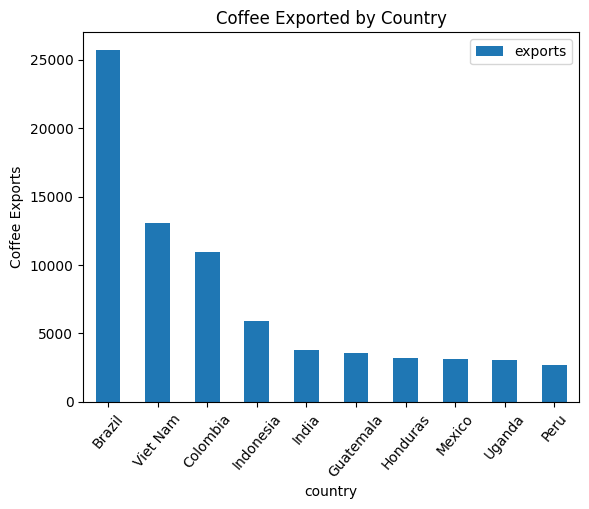

In [26]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='domestic_consumption', ascending=False)
top_ten_export = data.head(10)
top_ten_export = top_ten_export.plot.bar(x='country', y = 'exports', rot=50, title='Coffee Exported by Country')
top_ten_export.set_ylabel('Coffee Exports')

In [32]:
#Drop the outlier in the data (Brazil)
data = data.drop(data.query("country=='Brazil'").index)
data = data.sort_values(by='domestic_consumption', ascending=False)

Text(0, 0.5, 'Domestic Consumption')

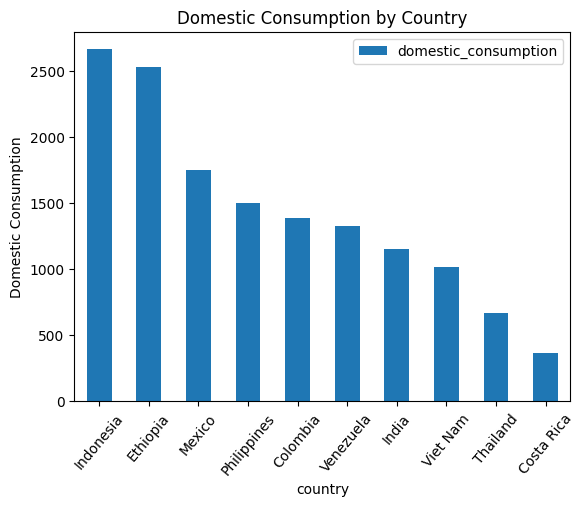

In [33]:
#Create bar graph of top ten Countries by coffee consumption
top_ten_consume = data.head(10)
top_ten_consume = top_ten_consume.plot.bar(x='country', y = 'domestic_consumption', rot=50, title='Domestic Consumption by Country')
top_ten_consume.set_ylabel('Domestic Consumption')

Text(0, 0.5, 'Coffee Exports')

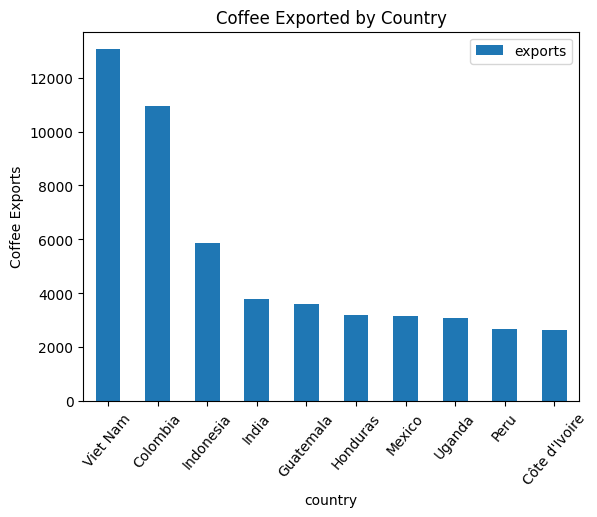

In [34]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
top_ten_export = data.head(10)
top_ten_export = top_ten_export.plot.bar(x='country', y = 'exports', rot=50, title='Coffee Exported by Country')
top_ten_export.set_ylabel('Coffee Exports')

In [35]:
#Create new dataframe off only numeric fields, create correlation map
stats = data[['exports', 'domestic_consumption', 'exports_crop_year', 'gross_opening_stocks', 'total_production']]
stats.corr()

,exports,domestic_consumption,exports_crop_year,gross_opening_stocks,total_production
exports,1.000000,0.531461,0.999601,0.779306,0.988202
domestic_consumption,0.531461,1.000000,0.525576,0.699045,0.641531
exports_crop_year,0.999601,0.525576,1.000000,0.774267,0.988120
gross_opening_stocks,0.779306,0.699045,0.774267,1.000000,0.809914
total_production,0.988202,0.641531,0.988120,0.809914,1.000000


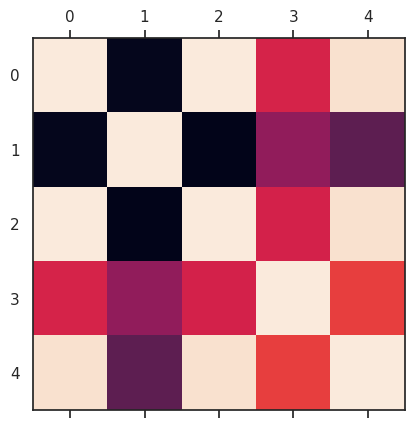

In [36]:
#Create heatmap of correlated data
sns.set_theme(style="white")
corr = stats.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1 )
corr.style.background_gradient(cmap='coolwarm')
plt.matshow(corr)

<Axes: title={'center': 'Country Domestic Consumption x Exports'}, xlabel='domestic_consumption', ylabel='exports'>

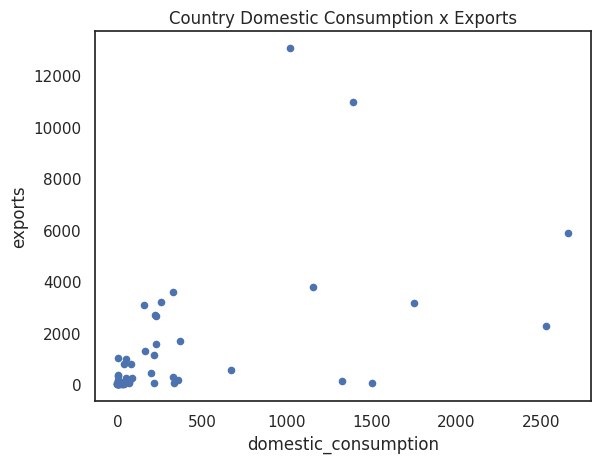

In [37]:
#Scatter plot comparing domestic consumption x exports
data.plot(kind='scatter', x='domestic_consumption', y='exports', title='South/Central American Domestic Consumption x Exports ')

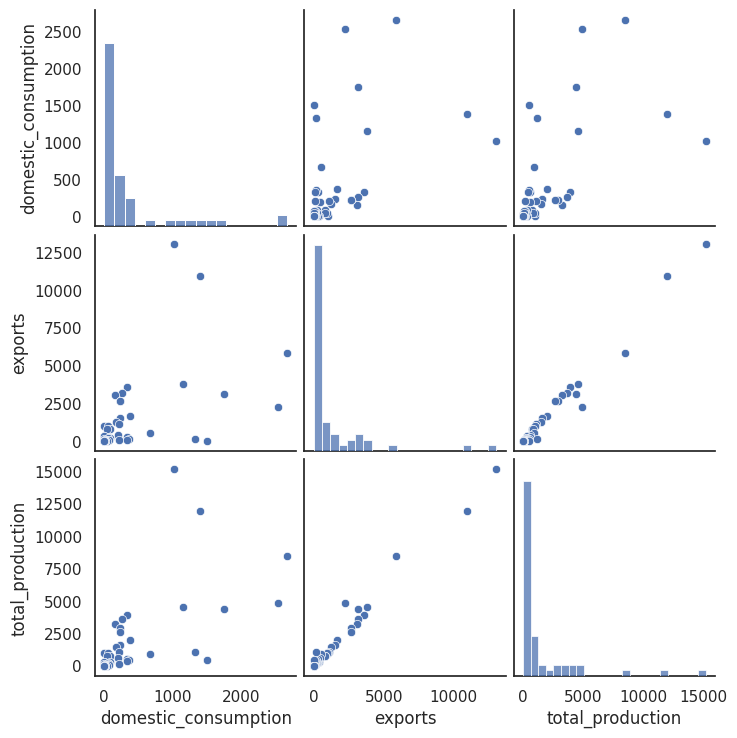

In [38]:
#Create a grid of pairplots between domestic consumption, exports, and production
sns.pairplot(data, vars=['domestic_consumption', 'exports', 'total_production'])
plt.show()

In [39]:
#Read in new data file
df = pd.read_csv('Domestic_Coffee_Consumption.csv')
df.head(10)

,Unnamed: 0,Country,Coffee type,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_domestic_consumption
0,0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,1,Bolivia,Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000
5,5,Indonesia,Robusta/Arabica,74520000,76800000,79140000,81540000,84000000,86580000,89160000,...,220020000,234000000,255000000,265020000,273000000,279000000,285000000,288000000,288360000,4920480000
6,6,Madagascar,Robusta,21000000,18000000,21000000,21600000,9999960,10020000,10020000,...,27000000,25800000,24600000,23400000,22200000,21600000,21900000,22500000,22500000,588705960
7,7,Malawi,Arabica,120000,120000,120000,120000,120000,120000,120000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,2340000
8,8,Papua New Guinea,Arabica/Robusta,180000,180000,180000,120000,120000,120000,120000,...,74160,102660,122340,115440,108000,120000,120000,120000,120000,3608400
9,9,Paraguay,Arabica,900000,900000,900000,1200000,1200000,1200000,1200000,...,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,35100000


<Axes: title={'center': 'Coffee Consumption over Time in Various Countries'}, xlabel='Year'>

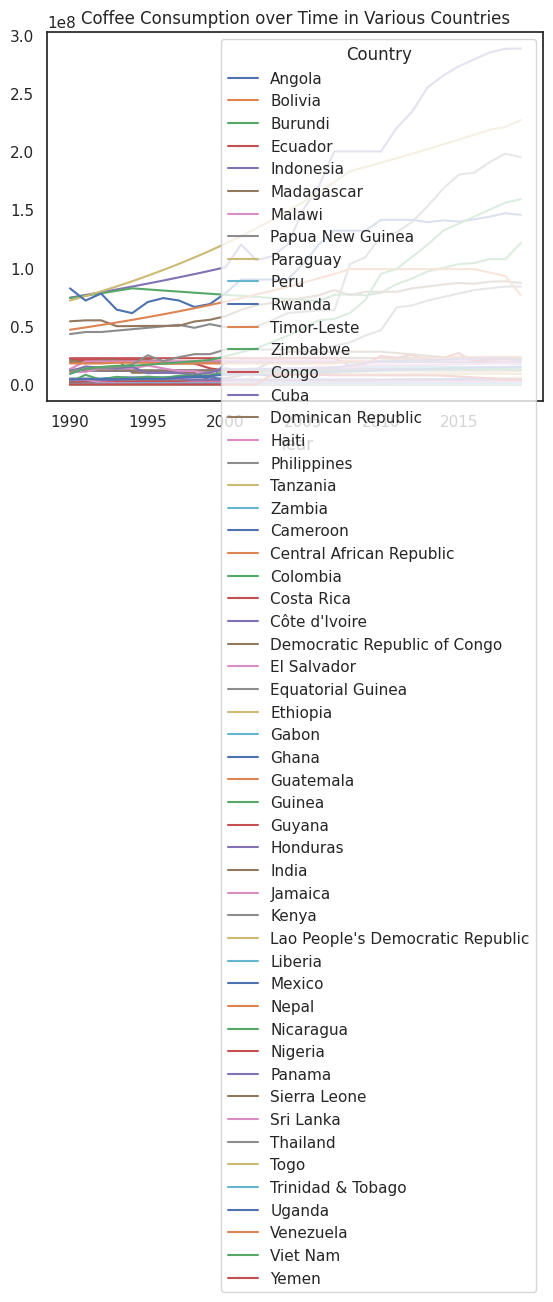

In [69]:
#Transpose the data frame
pivot = df.transpose()

#rename columns to row 1
pivot.columns = pivot.iloc[1]

#drop first two rows
pivot = pivot.iloc[3:]

#drop unnecessary row
pivot = pivot.drop('Total_domestic_consumption')

#rename index
pivot.index.names = ['Year']

pivot2 = pivot.copy()

#Drop the outlier in the data (Brazil)
pivot2.drop('Brazil', axis=1, inplace=True) 

pivot2.plot(title='Coffee Consumption Across South/Central America Over Time')

In [41]:
#Create new dataframe of coffee types, clean data a bit
types = df['Coffee type']
types = types.replace({'Robusta/Arabica':'Both'})
types = types.replace({'Arabica/Robusta':'Both'})
pie = types.value_counts()

<Axes: title={'center': 'Total Coffee Consumed by Type'}, ylabel='Coffee type'>

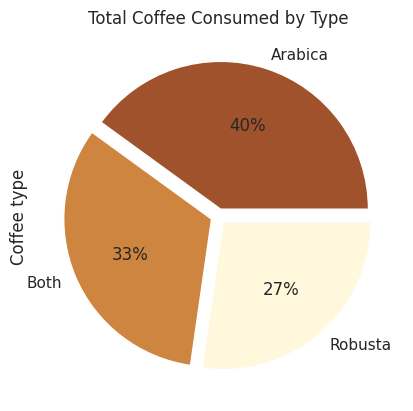

In [42]:
# Defining colors for the pie chart
colors = ['sienna', 'peru', 'cornsilk']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)

#Create pie chart of coffee types
pie.plot(kind='pie', title="Total Coffee Consumed by Type", autopct='%1.0f%%', colors=colors, explode=explode)

# Analyze Brazil

In [70]:
#Reset pivot and create Brazil dataframe with just Brazil data
Brazil = pivot['Brazil']
Brazil

Year
1990     492000000
1991     510000000
1992     534000000
1993     546000000
1994     558000000
1995     606000000
1996     660000000
1997     690000000
1998     732000000
1999     762000000
2000     792000000
2001     815400000
2002     825000000
2003     852000000
2004     896760000
2005     932280000
2006     979860000
2007    1026600000
2008    1059600000
2009    1103400000
2010    1147920000
2011    1183200000
2012    1219800000
2013    1205100000
2014    1219980000
2015    1230480000
2016    1273500000
2017    1319820000
2018    1332000000
2019    1320000000
Name: Brazil, dtype: object

Text(0, 0.5, 'Coffee Consumed (billion kg)')

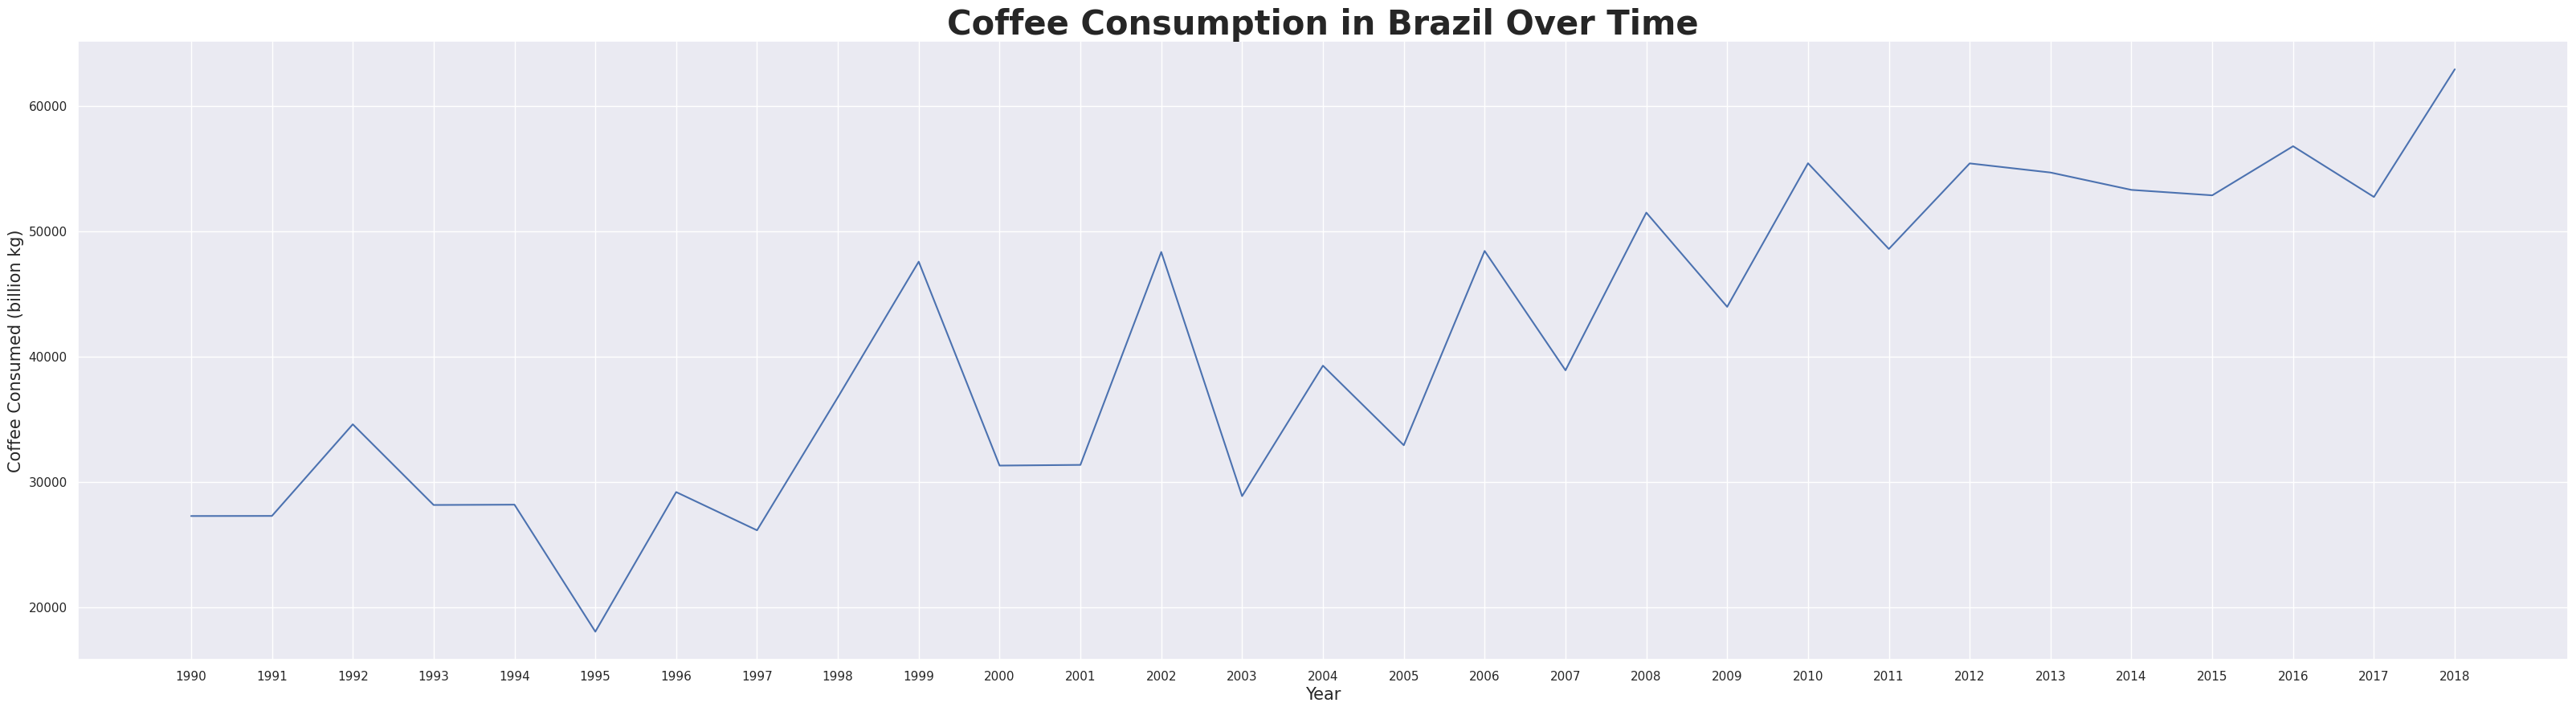

In [86]:
#Create line graph of Brazilian coffee consumption over time.
sns.set(rc={"figure.figsize":(40, 10)})
scatter = sns.lineplot(data=pivot, x='Year', y='Brazil')
scatter.set_title('Coffee Consumption in Brazil Over Time', fontdict={'size': 30, 'weight': 'bold'})
scatter.set_xlabel('Year', fontdict={'size': 15})
scatter.set_ylabel('Coffee Consumed (billion kg)', fontdict={'size': 15})

In [94]:
#Read in new data file
df = pd.read_csv('./data/retail-prices.csv')
df.head(10)

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
1,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457
2,Denmark,8.410596,8.101545,8.366446,7.682119,9.823400,12.295806,10.618102,10.949227,10.860927,...,11.677704,12.008830,15.275938,14.834437,14.039735,14.194260,12.913907,10.905077,11.103753,11.699779
3,Finland,6.578366,6.004415,5.430464,4.282561,6.026490,8.763797,7.108168,7.726269,7.549669,...,7.748344,8.145695,11.832230,10.596026,9.470199,9.514349,8.609272,8.101545,9.050773,9.359823
4,France,8.233996,7.571744,5.099338,4.481236,5.298013,8.145695,7.284768,6.092715,6.136865,...,8.366446,7.991170,9.116998,8.653422,8.653422,8.322296,6.865342,7.196468,7.505519,8.123620
5,Germany,8.807947,8.476821,8.830022,7.991170,9.227373,11.081678,9.205298,8.896247,8.918322,...,10.485651,10.507726,11.258278,10.463576,12.472406,12.626932,11.434879,11.147903,11.788079,12.119205
6,Italy,11.721854,12.406181,12.935982,10.132450,10.331126,12.582781,13.068433,12.030905,12.207506,...,16.953642,16.203091,18.807947,18.741722,19.845475,19.536424,16.512141,16.445916,16.931567,17.924945
7,Netherlands,6.688742,6.512141,6.909492,6.181015,7.196468,8.896247,8.057395,8.101545,8.101545,...,10.375276,10.088300,13.200883,12.869757,12.671082,12.604857,11.876380,10.529801,10.662252,10.331126
8,Portugal,9.094923,9.426049,10.927152,9.426049,9.668874,13.774834,13.068433,11.125828,10.772627,...,11.699779,10.883002,11.810155,12.560706,12.781457,12.649007,11.015453,10.883002,11.125828,11.832230
9,Spain,7.991170,7.726269,7.726269,6.158940,6.092715,9.823400,9.227373,7.880795,7.991170,...,9.183223,8.653422,9.757174,9.867550,10.000000,9.801325,8.432671,8.233996,8.476821,9.050773


<Axes: title={'center': 'Retail Price of Coffee over Time in Various Countries'}, xlabel='Year'>

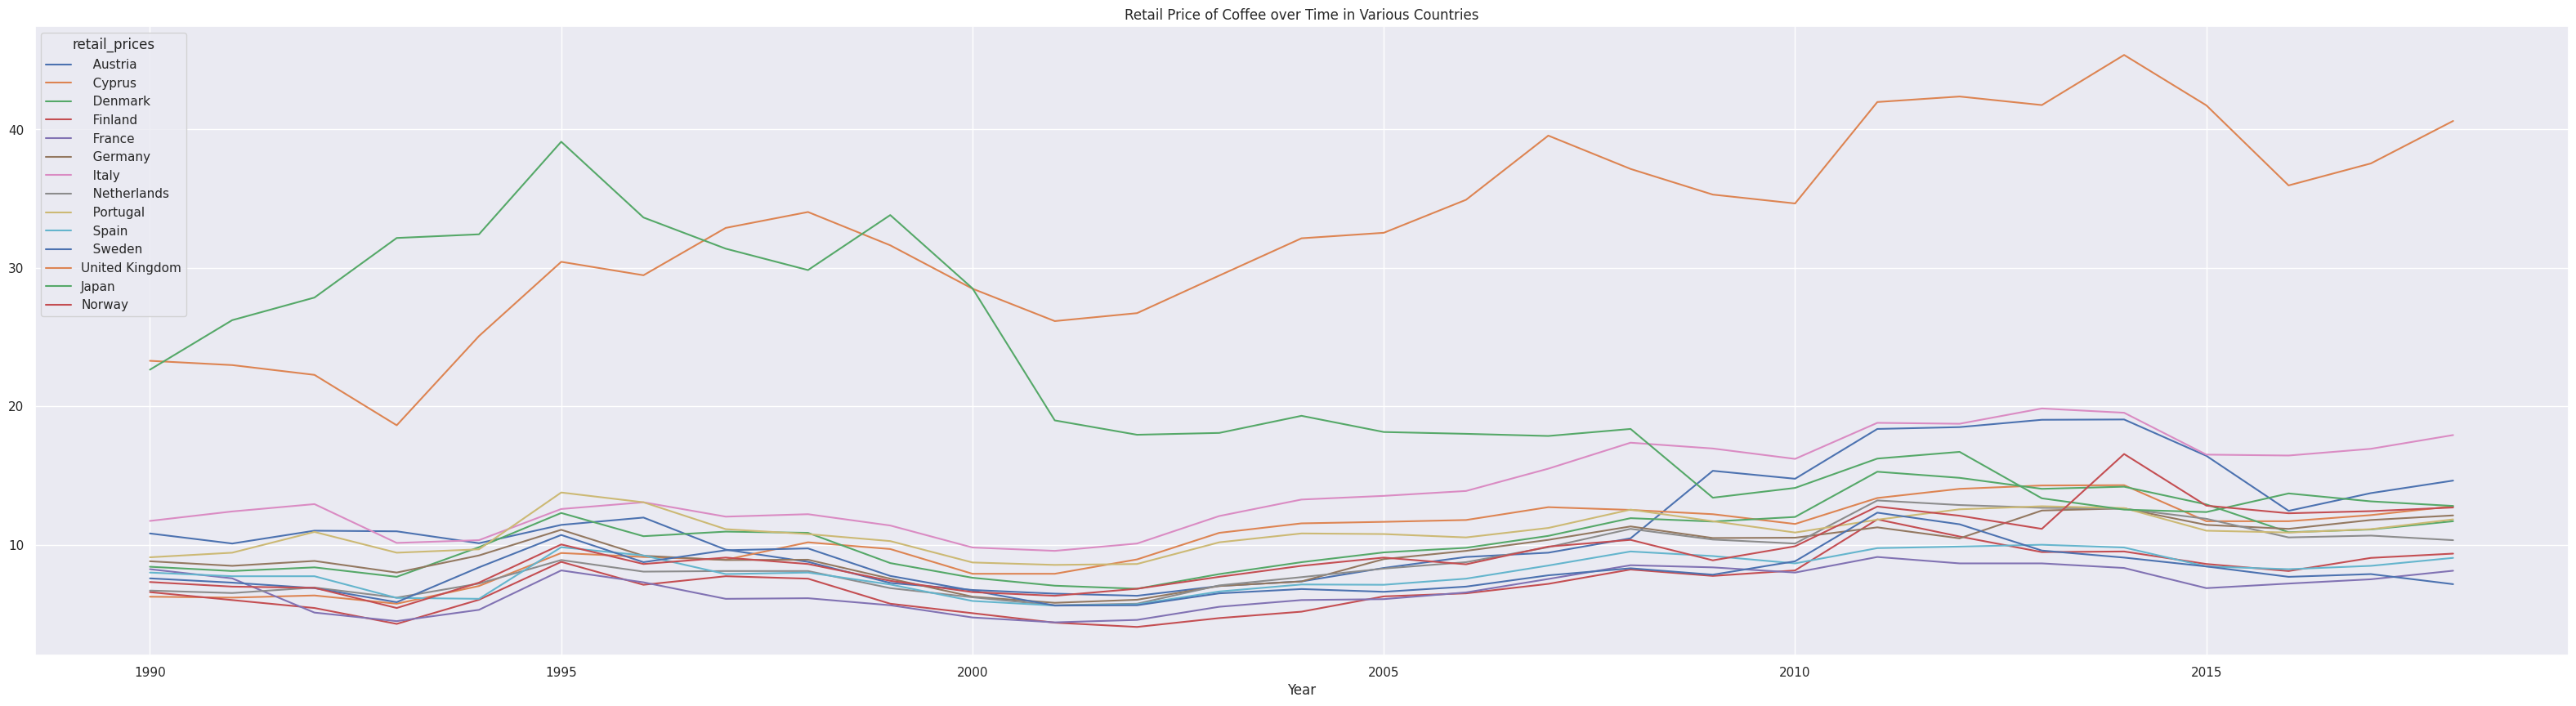

In [95]:
#Transpose the data frame
pivot = df.transpose()

#rename columns to row 1
pivot.columns = pivot.iloc[0]

#drop first two rows
pivot = pivot.iloc[1:]

#rename index
pivot.index.names = ['Year']
pivot['Years'] = pivot.index

pivot.plot(title='Retail Price of Coffee Across South/Central America Over Time')

[Text(0.5, 1.0, 'Retail Price of Coffee over Time in Various Countries')]

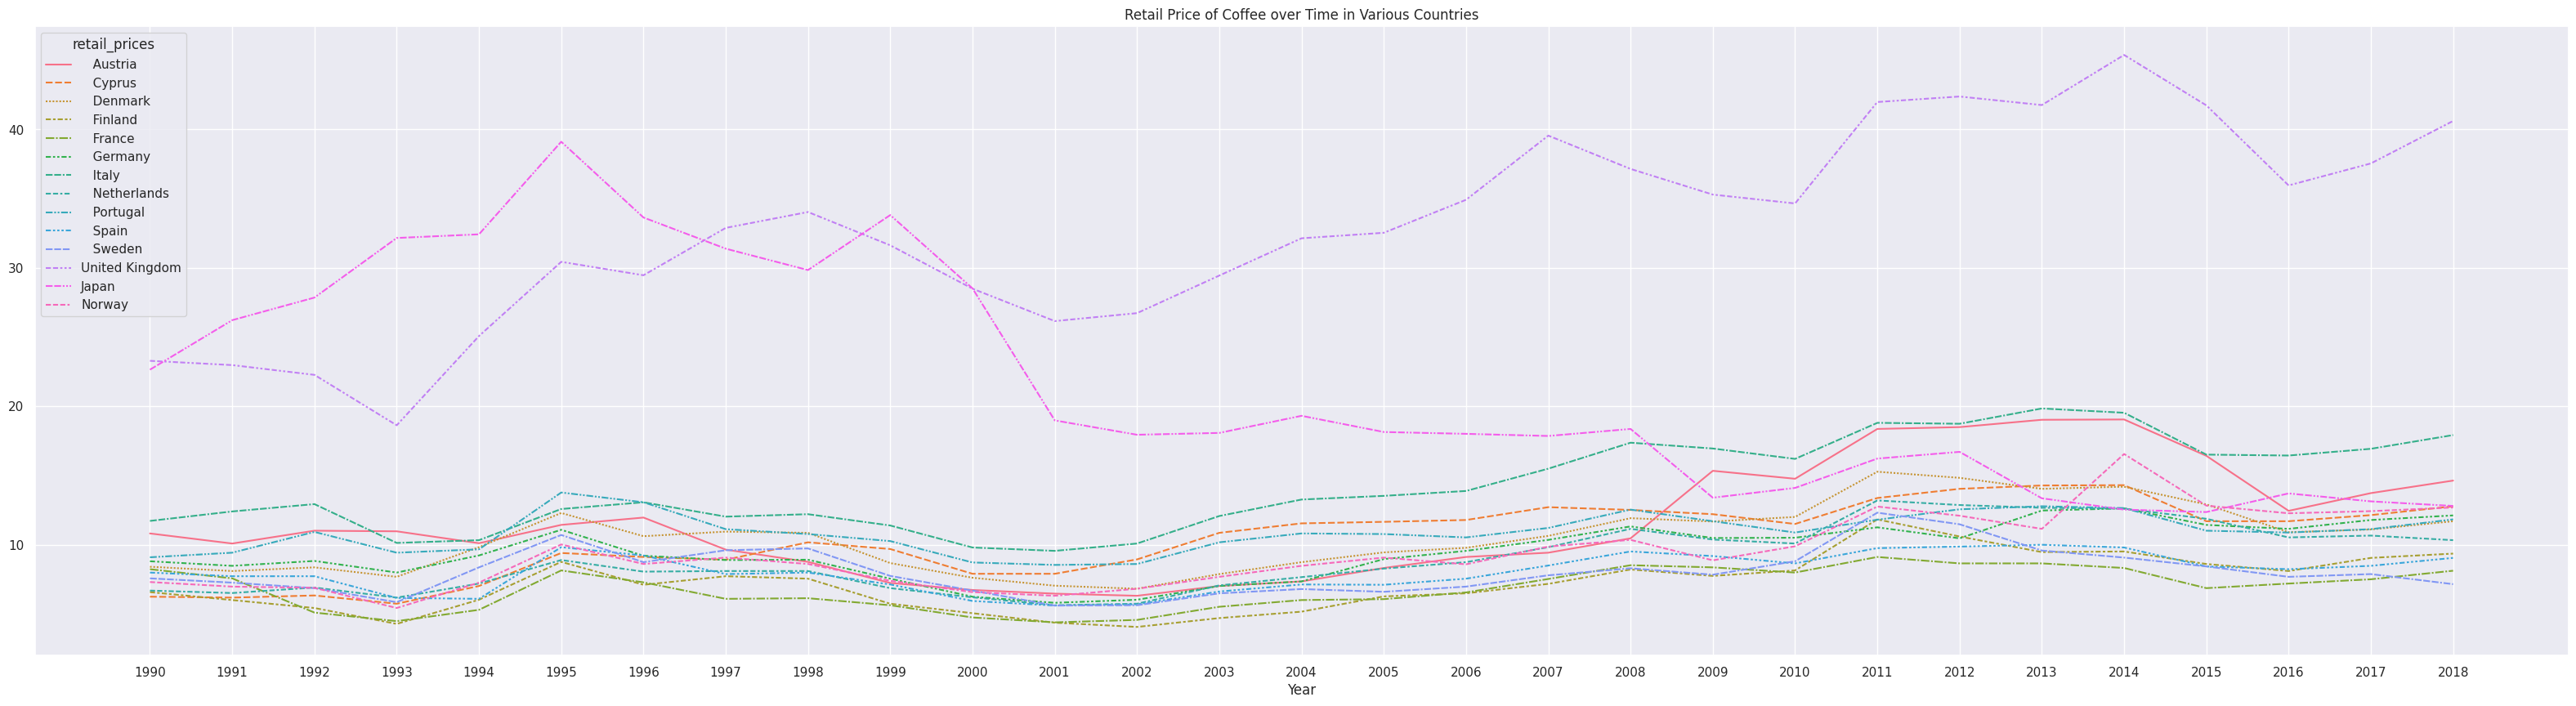

In [96]:
#lineplot using seaborn
sns.lineplot(data=pivot).set(title='Retail Price of Coffee Across South/Central America Over Time', )

AttributeError: 'list' object has no attribute 'set_axis_labels'

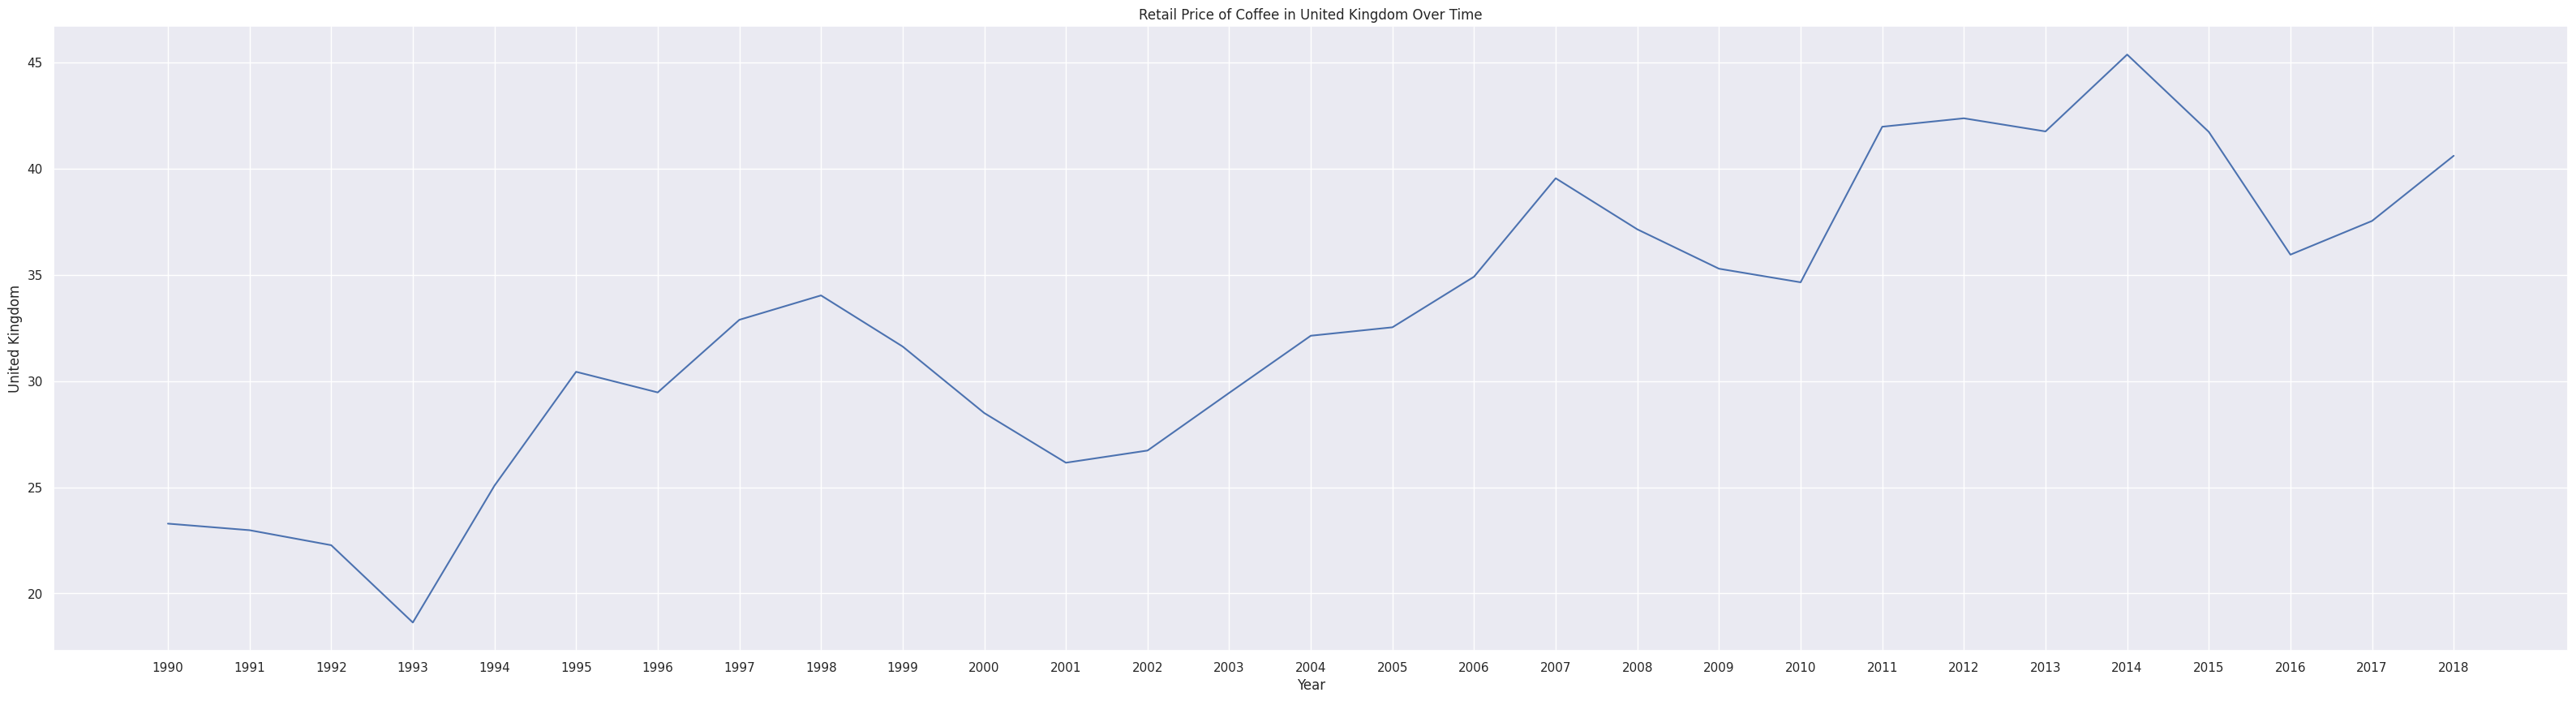

In [100]:
#lineplot using seaborn
sns.lineplot(data=pivot['United Kingdom']).set(title='Retail Price of Coffee in United Kingdom Over Time')

<Axes: title={'center': 'Coffee Grower Pay over Time in Various Countries'}, xlabel='Year'>

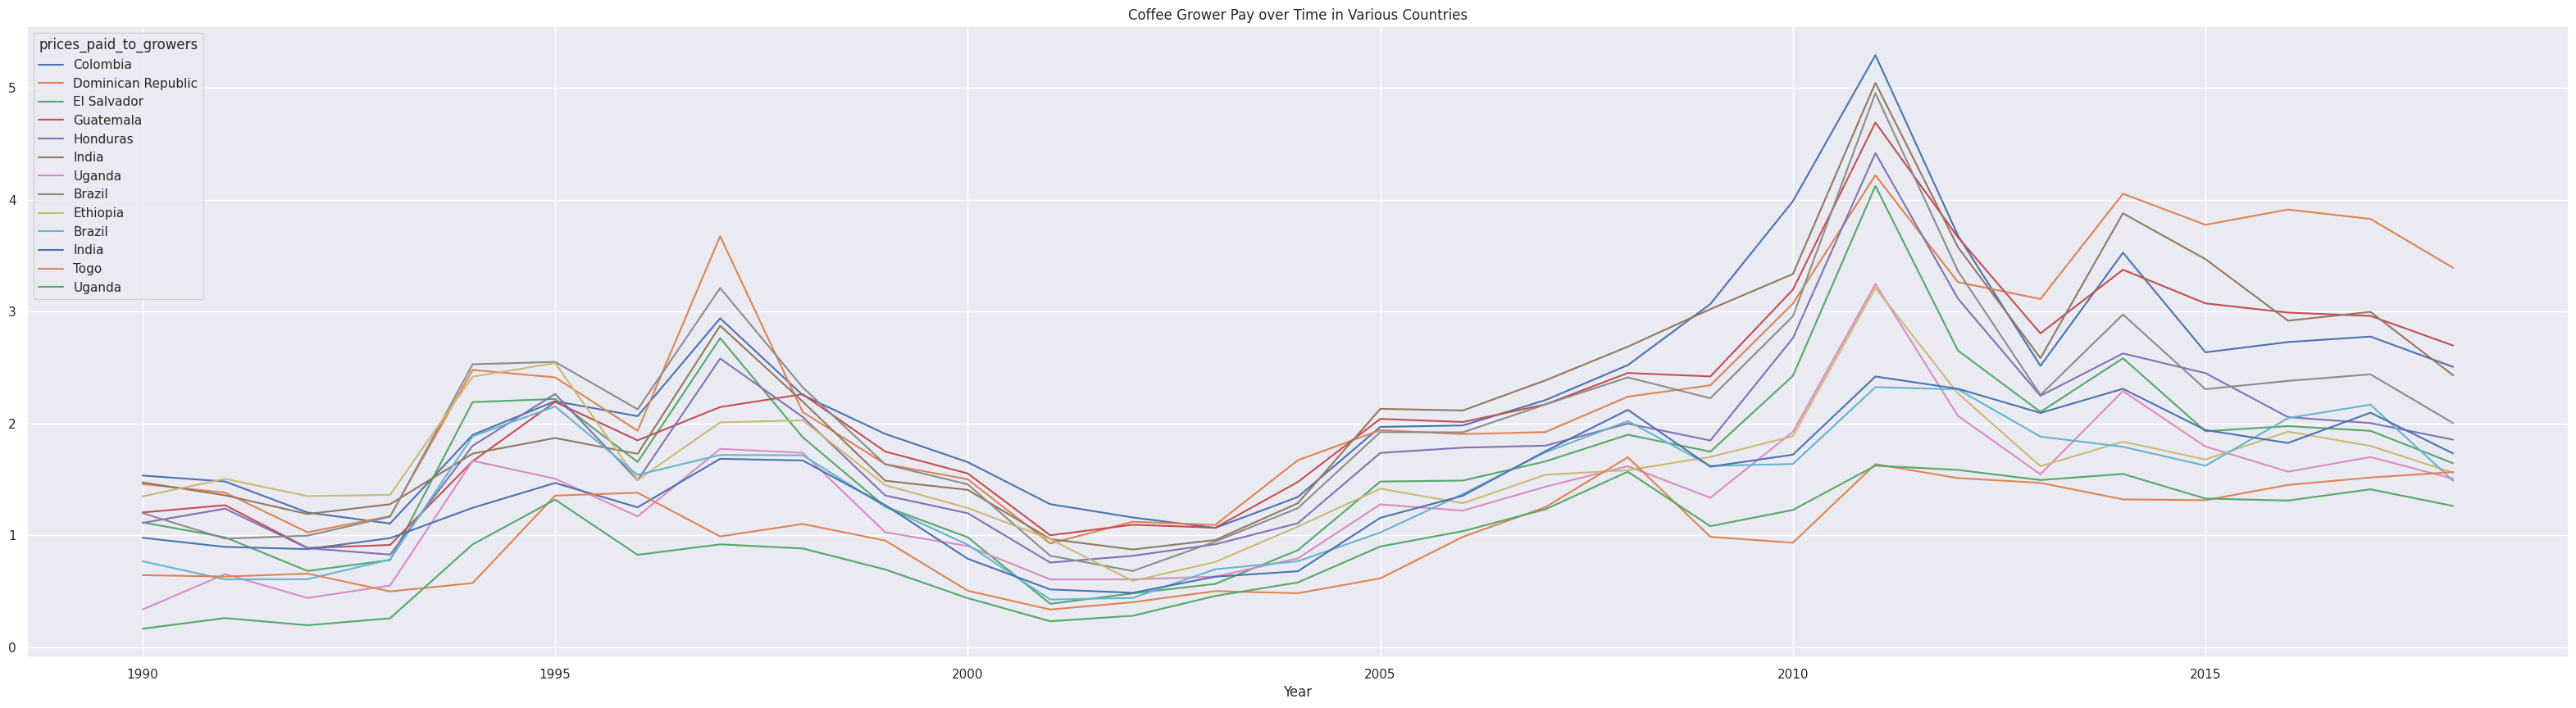

In [102]:
df = pd.read_csv('./data/prices-paid-to-growers.csv')

#Transpose the data frame
pivot = df.transpose()

#rename columns to row 1
pivot.columns = pivot.iloc[0]

#drop first two rows
pivot = pivot.iloc[1:]

#rename index
pivot.index.names = ['Year']
pivot['Years'] = pivot.index

pivot.plot(title='Coffee Grower Pay Across South/Central America Over Time')

In [104]:
df

,prices_paid_to_growers,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Colombia,1.534724,1.481790,1.204656,1.106477,1.898327,2.199185,2.065245,2.939673,2.253433,...,3.067442,3.985616,5.290868,3.679737,2.514539,3.525662,2.635854,2.727530,2.776185,2.505914
1,Dominican Republic,1.458168,1.382845,1.027841,1.172704,2.478234,2.412000,1.935342,3.673587,2.102616,...,2.340731,3.071276,4.217812,3.262839,3.112084,4.052172,3.775011,3.911395,3.826974,3.391053
2,El Salvador,1.116194,0.983322,0.682322,0.780397,2.191177,2.218826,1.656073,2.762552,1.877384,...,1.748205,2.425620,4.122256,2.651658,2.103276,2.582929,1.930439,1.976442,1.934159,1.645300
3,Guatemala,1.204956,1.270086,0.888099,0.914552,1.662711,2.192936,1.849170,2.146819,2.261521,...,2.420375,3.195830,4.689066,3.664007,2.804848,3.373810,3.073230,2.990444,2.960790,2.697022
4,Honduras,1.111470,1.238947,0.886057,0.828746,1.800576,2.263781,1.493616,2.580166,2.058671,...,1.848015,2.762887,4.415430,3.115841,2.247159,2.625614,2.449565,2.056691,2.003671,1.855291
5,India,1.473558,1.358371,1.191159,1.278669,1.730810,1.870104,1.728881,2.873698,2.195885,...,3.021792,3.335051,5.043230,3.575634,2.584011,3.877464,3.467918,2.918461,2.996744,2.430896
6,Uganda,0.337598,0.654322,0.441397,0.552298,1.666651,1.506821,1.169927,1.772936,1.738302,...,1.336532,1.925611,3.245623,2.068040,1.545905,2.289245,1.794042,1.569419,1.699698,1.506691
7,Brazil,1.199223,0.971150,0.997768,1.167263,2.529110,2.550172,2.126834,3.209923,2.323380,...,2.225150,2.957956,4.950552,3.361764,2.254700,2.973442,2.306547,2.380366,2.438757,2.003980
8,Ethiopia,1.348565,1.505322,1.351128,1.362442,2.418234,2.539011,1.495287,2.010060,2.027901,...,1.701150,1.886530,3.211088,2.269088,1.618110,1.837430,1.678360,1.927316,1.799278,1.560234
9,Brazil,0.769285,0.606947,0.609155,0.784638,1.885786,2.152316,1.540377,1.718671,1.716276,...,1.620826,1.638355,2.324366,2.304737,1.882698,1.791693,1.623110,2.048073,2.168022,1.488327


In [113]:
#create new average column
pivot['average'] = df.mean()

/tmp/ipykernel_64272/3105510802.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pivot['average'] = df.mean()


[Text(0.5, 1.0, 'Average Pay to Growers Across South/Central America Over Time')]

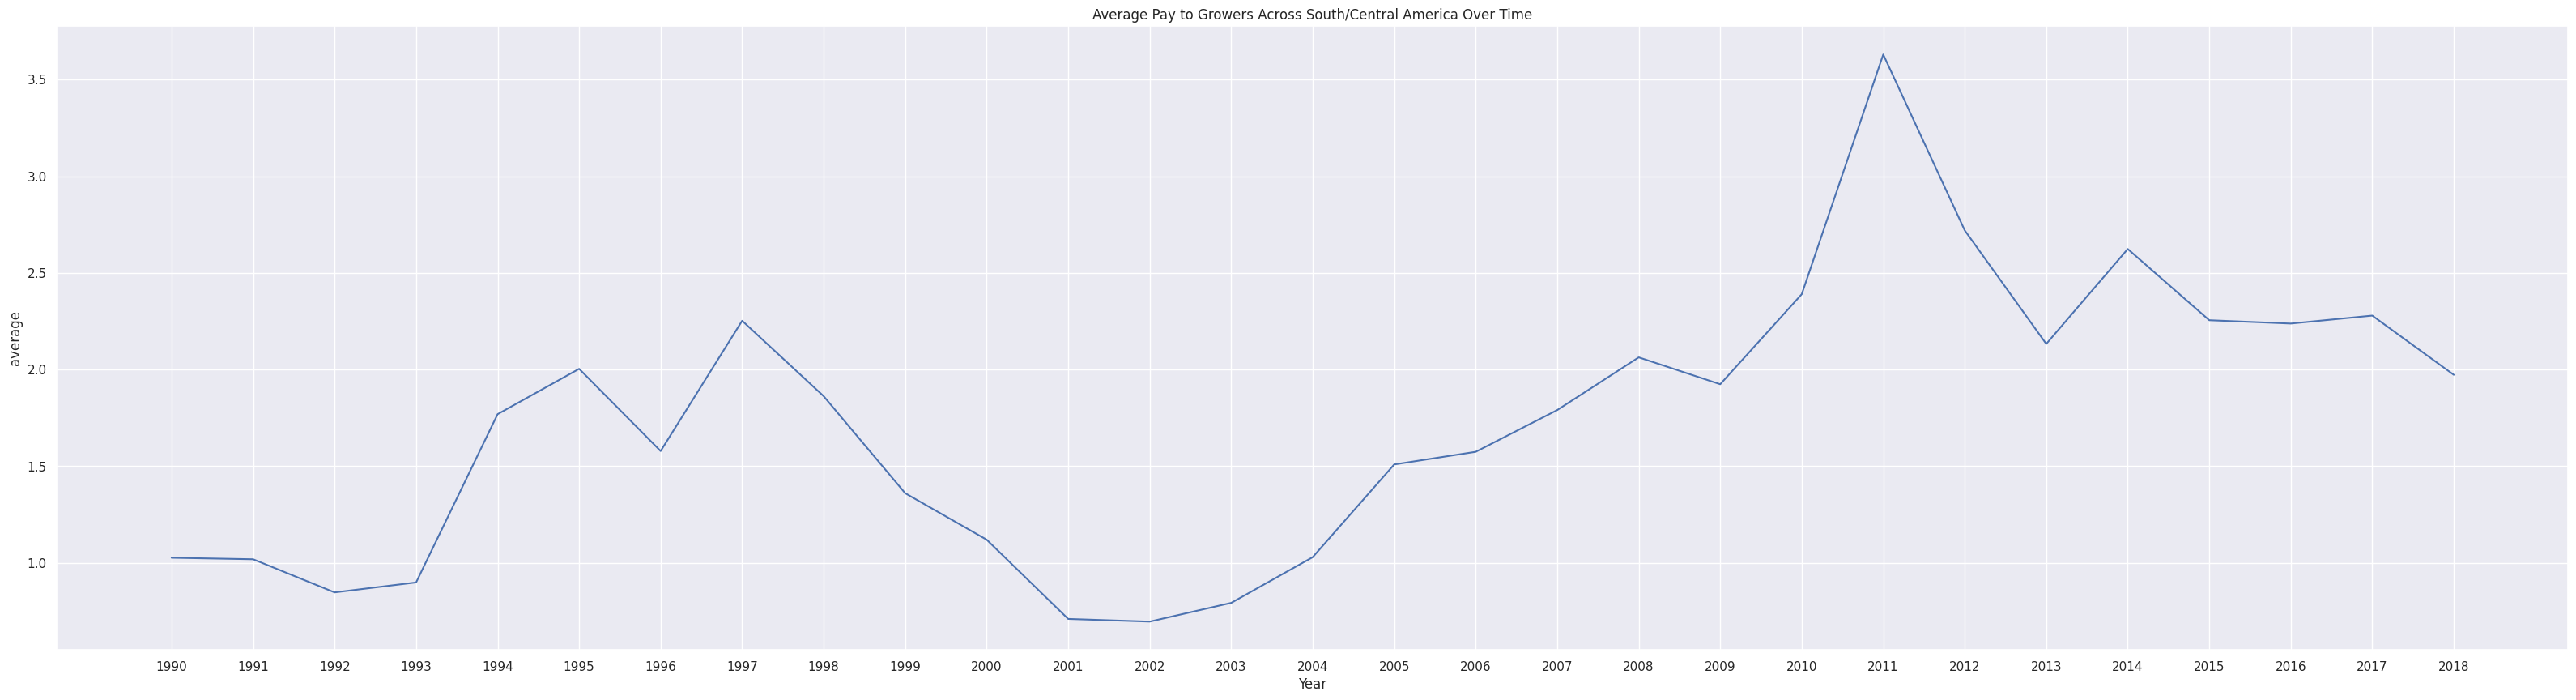

In [116]:
#lineplot using seaborn
sns.lineplot(data=pivot['average']).set(title='Average Pay to Growers Across South/Central America Over Time')

In [117]:
compare = pivot['average']

In [118]:
compare['average2'] = 

Year
1990    1.026493
1991    1.018779
1992    0.847206
1993    0.898745
1994    1.769350
1995    2.003801
1996    1.578438
1997    2.252581
1998    1.862335
1999    1.360487
2000    1.119992
2001    0.709984
2002    0.696104
2003    0.793009
2004    1.029489
2005    1.509106
2006    1.574560
2007    1.790530
2008    2.063193
2009    1.924143
2010    2.389869
2011    3.629983
2012    2.720055
2013    2.132745
2014    2.623876
2015    2.255341
2016    2.238045
2017    2.279210
2018    1.972795
Name: average, dtype: float64